First, we need to install packages

In [ ]:
install.packages("randomForest")
install.packages("BBmisc")
install.packages("pROC")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘checkmate’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’




Then we need to load libraries and data (train data)

In [ ]:
library(randomForest)
library(BBmisc)
library(pROC)

options(stringsAsFactors = FALSE)
numtrees <- as.numeric(500)

#Prepare training table
trainset <- read.table("https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt", sep='\t', header=FALSE, stringsAsFactors=FALSE)

#transpose
id_n = 1
trainset = data.frame(t(trainset))

#define column names (data has been transposed, so these are genes)
cnam <- t(trainset)[,1]
trainset <- trainset[-1,]
colnames(trainset) <- cnam

#define row names (data has been transposed, so these are names of samples)
rnam <- trainset[,id_n]
trainset <- trainset[,-id_n]
rownames(trainset) <- rnam

#define numeric data
trainset[,1]<- as.factor(trainset[,1])
len= dim (trainset)[2]
for (j in (2:len)){
  trainset [,j]<- as.numeric(trainset[,j])
}


randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘BBmisc’


The following object is masked from ‘package:base’:

    isFALSE


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Then we load and prepare the test data

In [ ]:
#Prepare testing dataset - transpose if required, etc.
testset <- read.table("https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt", sep="\t", header=FALSE, stringsAsFactors=FALSE)
testset <- data.frame(t(testset))

#define column names
cnam <- t(testset)[,1]
testset <- testset[-1,]
colnames(testset) <- cnam

#define row names
rnam <- testset[,1]
testset <- testset[,-1]
rownames(testset) <- rnam

len <- dim (testset)[2]
for (j in (1:len)){
  testset [,j]<- as.numeric(testset[,j])
}


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Now we can compute the model

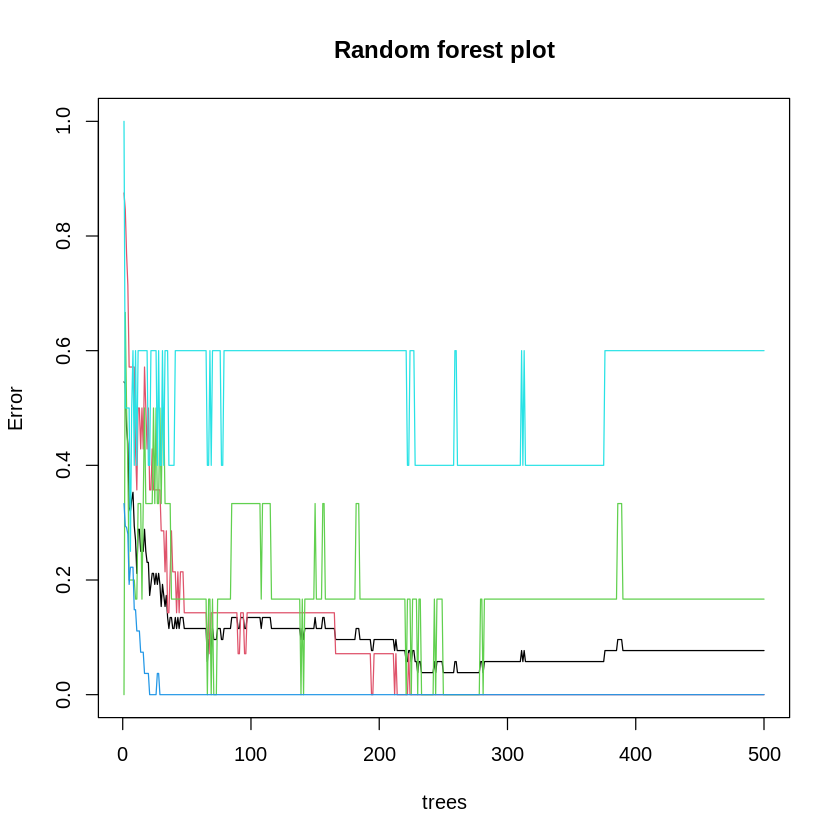

In [ ]:
#Perform main computations - train classifiers
trainset [,1] <- factor(trainset[,1])
rforest <- randomForest(class ~ ., data=trainset, ntree=numtrees, importance=TRUE)

#Draw plots
plot (rforest, main='Random forest plot', lty=1, cex=1.5)


Create an output for features by feature importance

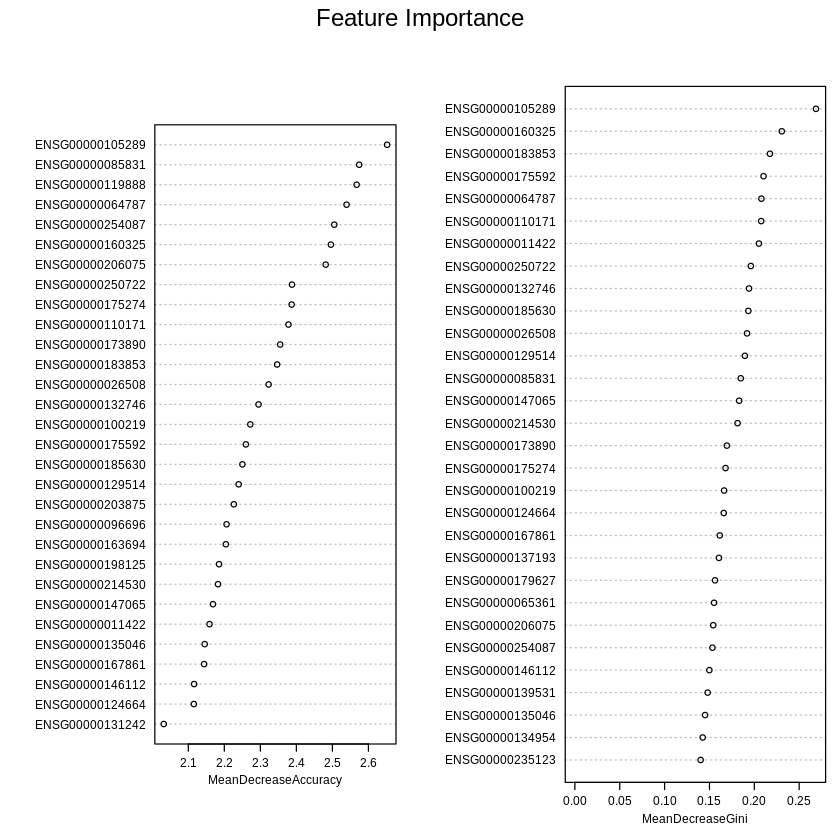

In [ ]:
#Feature importance
varImpPlot(rforest, main='Feature Importance', pch=1, cex=0.6)

#Store features in a vaiable as features
features <- varImpPlot(rforest, main='Feature Importance', pch=1, cex=0.6)
#Write features in a txt file format
write.table(features,'features_importance.txt', row.names=TRUE,col.names=NA, sep='\t', quote=FALSE)


test the model on test data

In [ ]:
#Apply classifier to the test set
prediction <- predict(rforest, testset, type='prob')
prediction <- data.frame(prediction, check.names = FALSE)
rownames(prediction) <- rownames(testset)

#Print out prediction values
a <- print(prediction)
write.table(a, file = "prediction_class.txt", sep="\t", quote=F, row.names = T)
#print(rforest)
#print(rforest$err.rate)
#print(rforest$votes)
#print(trainset$class)


            Basal Claudin-low Luminal Normal-like
184A1       0.150       0.066   0.030       0.754
184B5       0.112       0.024   0.060       0.804
21MT1       0.896       0.016   0.054       0.034
21NT        0.906       0.010   0.064       0.020
21PT        0.920       0.006   0.046       0.028
600MPE      0.050       0.022   0.890       0.038
AU565       0.032       0.000   0.962       0.006
BT474       0.020       0.012   0.964       0.004
BT483       0.016       0.006   0.974       0.004
BT549       0.100       0.824   0.026       0.050
CAMA1       0.048       0.020   0.928       0.004
EFM192A     0.010       0.002   0.986       0.002
EFM192B     0.060       0.006   0.928       0.006
EFM192C     0.028       0.000   0.972       0.000
HCC1143     0.822       0.058   0.060       0.060
HCC1395     0.092       0.794   0.048       0.066
HCC1419     0.010       0.012   0.970       0.008
HCC1428     0.032       0.010   0.954       0.004
HCC1569     0.766       0.082   0.106       0.046


evaluate model accuracy and specificity

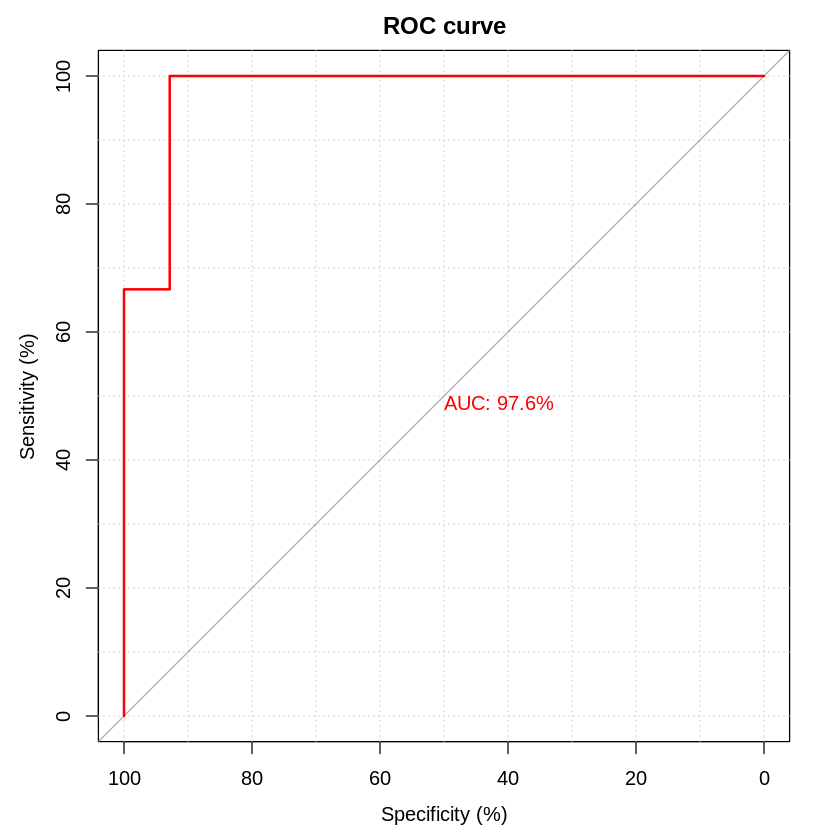

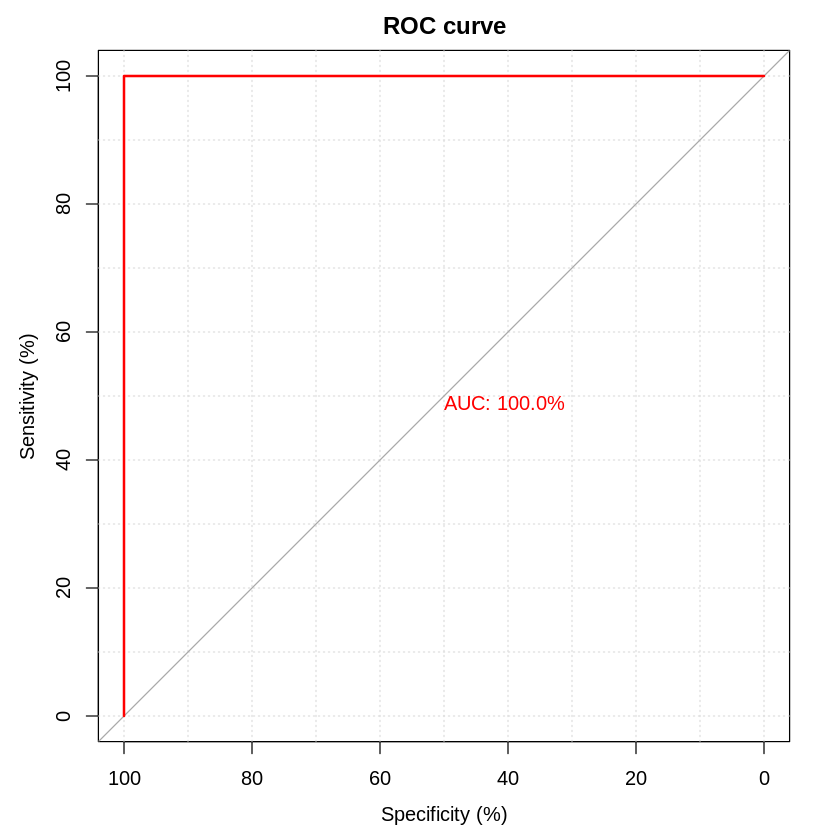

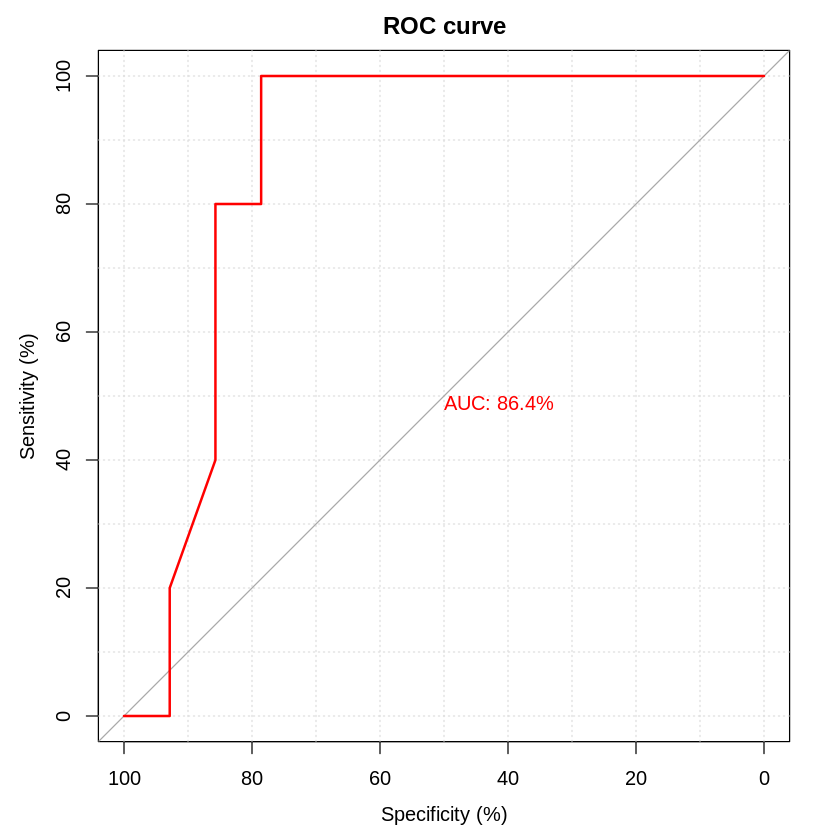

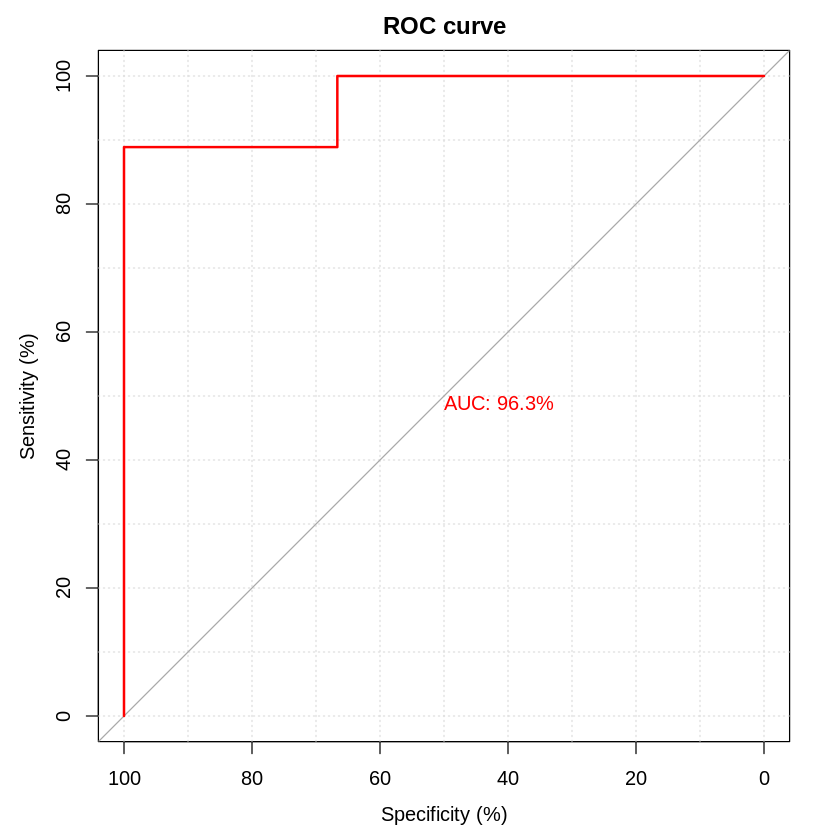

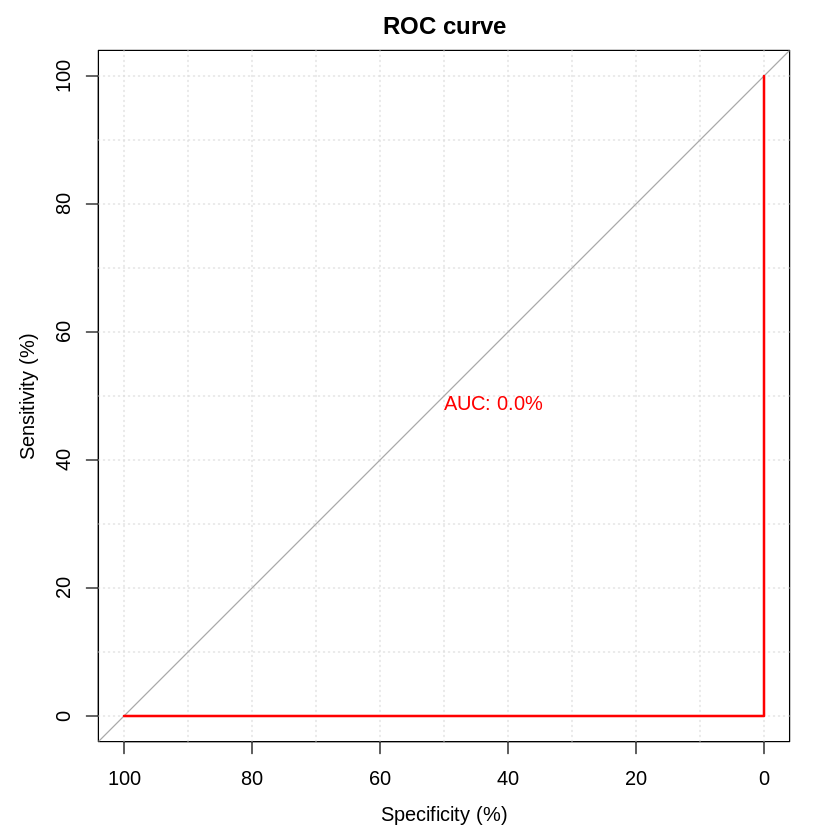


Call:
multiclass.roc.default(response = trainset$class, predictor = rforest$votes[,     1], percent = TRUE, direction = ">", grid = TRUE, print.auc = TRUE,     col = "red", plot = TRUE, main = "ROC curve")

Data: rforest$votes[, 1] with 4 levels of trainset$class: Basal, Claudin-low, Luminal, Normal-like.
Multi-class area under the curve: 63.39%



Call:
roc.default(response = response, predictor = predictor, levels = X,     percent = percent, direction = ..1, auc = FALSE, ci = FALSE,     plot = TRUE, grid = TRUE, print.auc = TRUE, col = "red",     main = "ROC curve")

Data: predictor in 14 controls (response Basal) > 6 cases (response Claudin-low).
Area under the curve not computed.

[1] 4

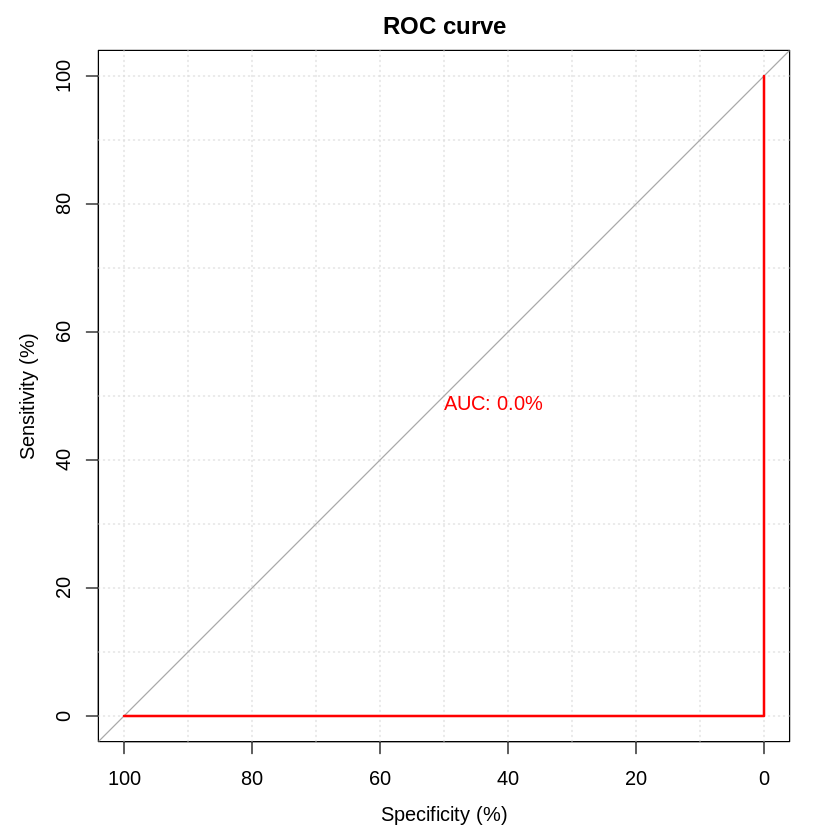

In [ ]:
#AUC and ROC curves
roc1 <- multiclass.roc(trainset$class,rforest$votes[,1], percent=TRUE, grid=TRUE, print.auc=TRUE, col='red', direction='>', plot=TRUE, main="ROC curve")
print(roc1)

roc1$rocs[[1]]
length(roc1$levels)

In [ ]:
roc1$rocs

[[1]]

Call:
roc.default(response = response, predictor = predictor, levels = X,     percent = percent, direction = ..1, auc = FALSE, ci = FALSE,     plot = TRUE, grid = TRUE, print.auc = TRUE, col = "red",     main = "ROC curve")

Data: predictor in 14 controls (response Basal) > 6 cases (response Claudin-low).
Area under the curve not computed.

[[2]]

Call:
roc.default(response = response, predictor = predictor, levels = X,     percent = percent, direction = ..1, auc = FALSE, ci = FALSE,     plot = TRUE, grid = TRUE, print.auc = TRUE, col = "red",     main = "ROC curve")

Data: predictor in 14 controls (response Basal) > 27 cases (response Luminal).
Area under the curve not computed.

[[3]]

Call:
roc.default(response = response, predictor = predictor, levels = X,     percent = percent, direction = ..1, auc = FALSE, ci = FALSE,     plot = TRUE, grid = TRUE, print.auc = TRUE, col = "red",     main = "ROC curve")

Data: predictor in 14 controls (response Basal) > 5 cases (response Nor

Print ROC curves

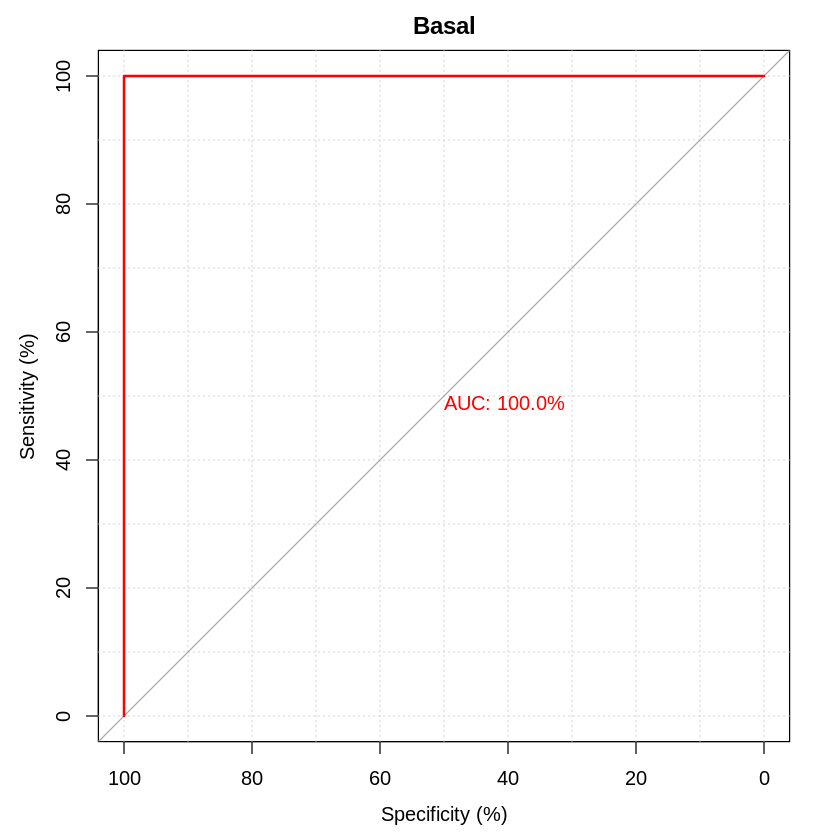

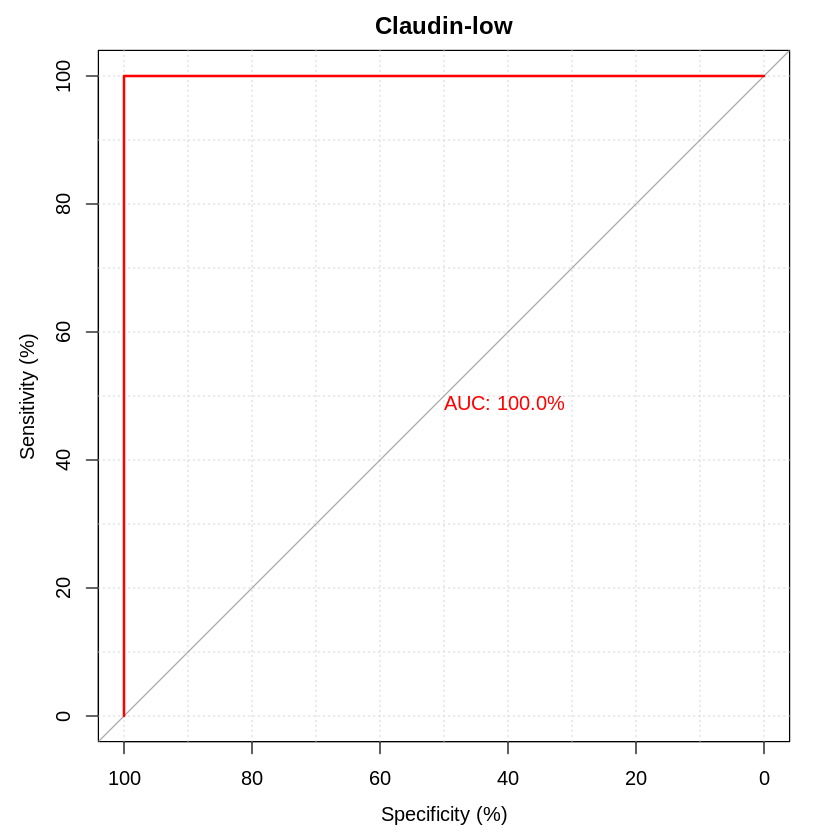

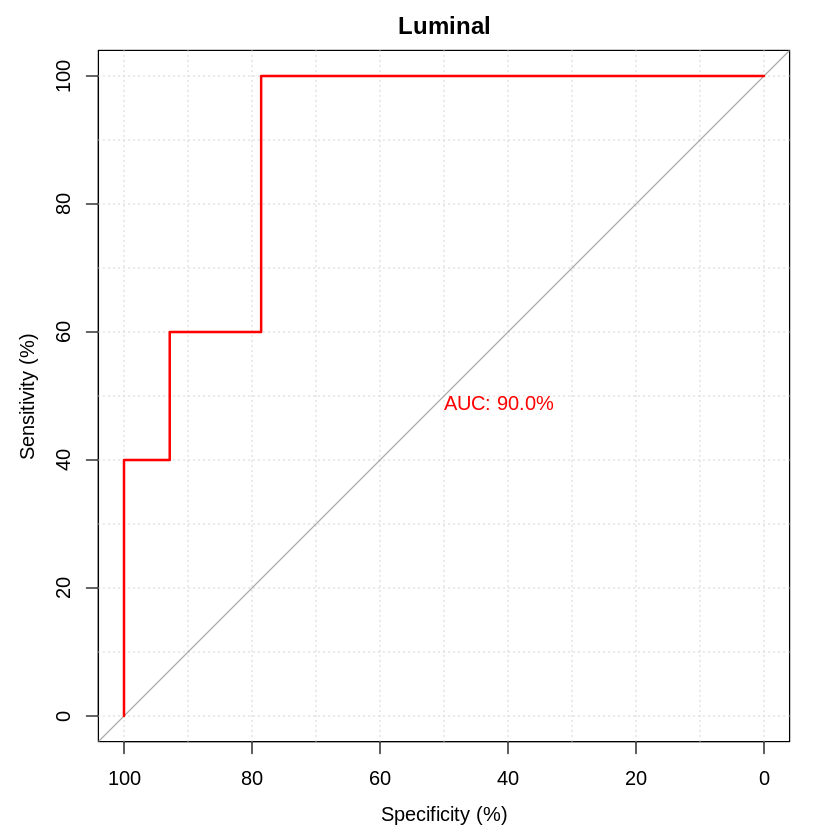

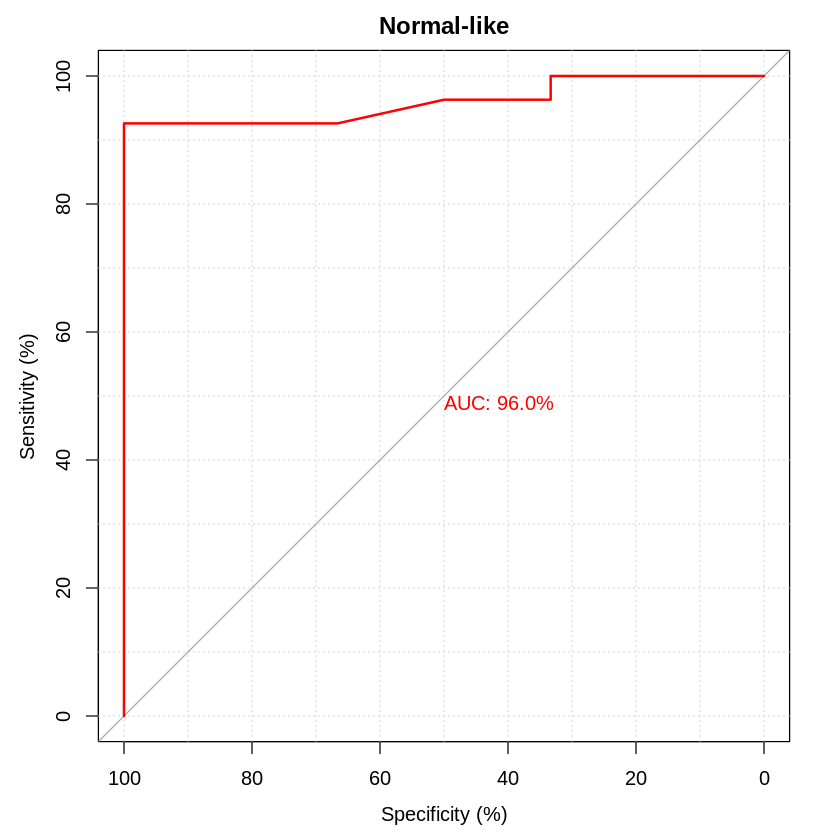

In [ ]:
for(i in c(1,2,3,4)){
  plot(roc1$rocs[[i]], colour = "green", main = roc1$levels[[i]], percent=TRUE, grid=TRUE, print.auc=TRUE, col='red')
}



.....

,MeanDecreaseAccuracy,MeanDecreaseGini
ENSG00000000419,0,0
ENSG00000001036,0,0
ENSG00000001084,0,0
ENSG00000001497,0,0
ENSG00000001617,0,0
ENSG00000001630,0,0
ENSG00000001631,0,0
ENSG00000002330,0,0
ENSG00000002549,0,0
ENSG00000002586,0,0


,MeanDecreaseAccuracy,MeanDecreaseGini
,<dbl>,<dbl>
ENSG00000000419,0,0
ENSG00000001036,0,0
ENSG00000001084,0,0
ENSG00000001497,0,0
ENSG00000001617,0,0
ENSG00000001630,0,0


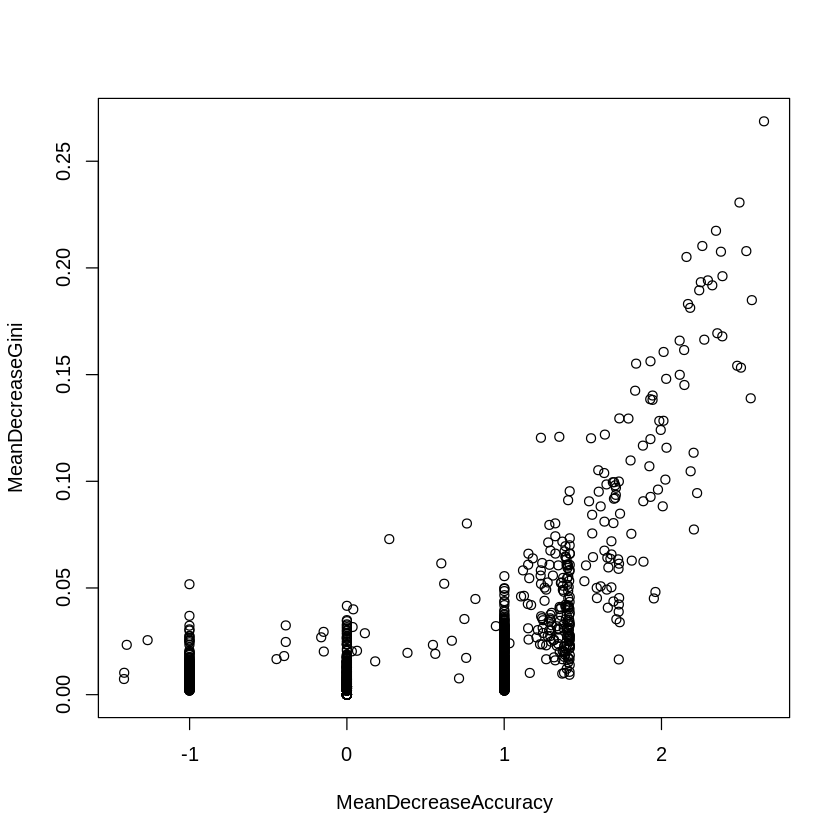

In [ ]:
head(features, 10)

plot(features)

features1 <- as.data.frame(features)

head(features1)

In [ ]:

#Store features in a vaiable as features
#features <- varImpPlot(rforest, main='Feature Importance', pch=1, cex=0.6)


#Write features in a txt file format
#write.table(features,'features_importance.txt', row.names=TRUE,col.names=NA, sep='\t', quote=FALSE)

# Sort features based on meandecrease accuracy value
sorted_features <- as.data.frame(features[order(features[,"MeanDecreaseAccuracy"], decreasing = TRUE),])

#select only top features (meanDecreaseaccuracy >1.5)
top_features <- sorted_features[sorted_features$MeanDecreaseAccuracy>1.5, ]

top1 <- as.data.frame(row.names(top_features))
#add class column as well
top1<-rbind(c("class"), top1)

colnames(top1) <- c("ID")

#Read full data
full_data <- read.table("https://code.omicslogic.com/assets/datasets/cell_lines/CellLines_52samples_ExprData_T1.txt", sep='\t', header=TRUE, stringsAsFactors=FALSE)

# Prepare data with only selected top features
selected_data <- as.data.frame(full_data[ full_data$id %in% c(top1$ID), ])

selected_data_t <- as.data.frame(t(selected_data))

colnames(selected_data_t)<-NULL


#Write selected data in a txt file
write.table(selected_data,'selected_data.txt', row.names=F,  sep='\t', quote=FALSE)

#Write selected data in a txt file
write.table(selected_data_t,'selected_data_transposed.txt', row.names=T, col.names=F, sep='\t', quote=FALSE)



In [ ]:
head(selected_data, 10)

,id,X184A1,X184B5,X21MT1,X21NT,X21PT,X600MPE,AU565,BT474,BT483,⋯,SUM225CWN,SUM229PE,SUM52PE,T47D,T47D_Kbluc,UACC812,UACC893,ZR751,ZR7530,ZR75B
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,class,Normal-like,Normal-like,Basal,Basal,Basal,Luminal,Luminal,Luminal,Luminal,⋯,Luminal,Basal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal,Luminal
126,ENSG00000011422,4.5,4.59,7.28,6.5,6.97,3.27,3.67,1.12,2.49,⋯,4.11,6.18,4.43,1.28,1.74,1.85,2.97,2.82,1.33,2.2
162,ENSG00000019549,6.01,5.19,4.23,4.15,4.4,0,0.11,0.04,0.9,⋯,0.48,5.09,2.83,0,0,0.14,0,0,0.06,0
188,ENSG00000026508,9.12,8.57,8.4,8.3,8.42,3,4.08,3.44,4.55,⋯,8.04,8.86,0.2,5.65,5.85,5.67,5.35,4.86,5.91,0.68
270,ENSG00000049323,4.51,3.91,0.82,1.29,0.87,3.97,5.54,3.06,4.03,⋯,2.3,1.96,3.12,3.84,3.57,3,4.03,3.9,3.66,3.02
342,ENSG00000062038,7.45,8.25,7.22,7.61,7.55,5.07,1.43,3.39,4.4,⋯,6.66,7.76,5.31,5.18,5.4,3.33,8.74,6.8,5.45,5.84
373,ENSG00000064787,0,0.1,0.11,0.23,0.04,3.75,6.61,8.24,4.28,⋯,4.38,0.52,2.07,3.21,1.58,4.16,5.67,4.41,8.03,5.11
389,ENSG00000065361,2.41,3.72,5.52,5.69,5.85,6.91,7.73,6.47,7.57,⋯,6.31,4.87,5.66,7.01,6.43,7.26,6.5,6.14,7.35,6.57
509,ENSG00000072858,0.07,0.31,1.41,1.21,1.82,1.4,2.97,4.02,3.78,⋯,2.39,0.64,3.24,3.95,2.68,2.41,3.97,1.8,4,1


[1]  52 104

,ENSG00000011422,ENSG00000019549,ENSG00000026508,ENSG00000049323,ENSG00000062038,ENSG00000064787,ENSG00000065361,ENSG00000072858,ENSG00000073350,ENSG00000075618,⋯,ENSG00000224081,ENSG00000227036,ENSG00000233429,ENSG00000235123,ENSG00000237441,ENSG00000241978,ENSG00000249992,ENSG00000250722,ENSG00000254087,ENSG00000265681
X184A1,4.50,6.01,9.12,4.51,7.45,0.00,2.41,0.07,4.63,8.85,⋯,3.92,5.21,6.22,0.00,3.63,5.30,1.03,0.00,3.52,10.78
X184B5,4.59,5.19,8.57,3.91,8.25,0.10,3.72,0.31,5.47,6.60,⋯,4.26,5.16,5.19,0.00,5.73,3.59,0.24,2.54,2.37,10.82
X21MT1,7.28,4.23,8.40,0.82,7.22,0.11,5.52,1.41,6.61,9.52,⋯,5.33,4.28,0.16,0.50,5.57,3.35,3.45,0.63,4.35,9.29
X21NT,6.50,4.15,8.30,1.29,7.61,0.23,5.69,1.21,6.32,9.02,⋯,4.19,4.19,0.00,0.08,6.07,3.57,3.51,3.31,4.27,9.21
X21PT,6.97,4.40,8.42,0.87,7.55,0.04,5.85,1.82,5.91,9.19,⋯,4.01,4.18,0.00,0.00,5.79,3.98,3.74,3.54,4.29,8.98
X600MPE,3.27,0.00,3.00,3.97,5.07,3.75,6.91,1.40,5.50,0.25,⋯,1.64,1.89,0.00,1.33,6.23,2.97,0.00,4.73,2.56,10.01


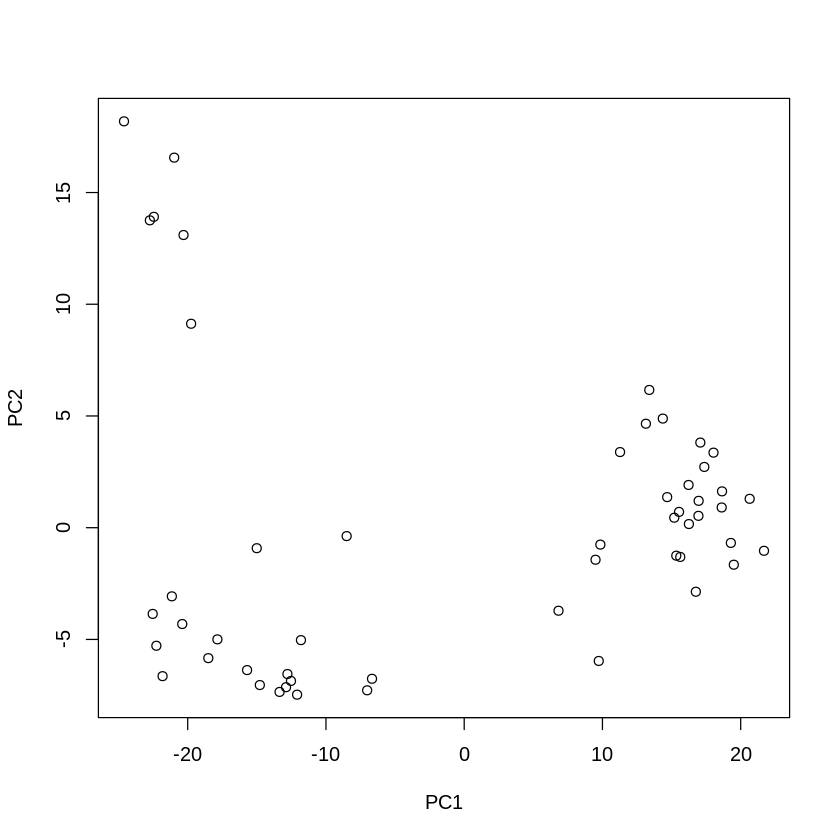

In [ ]:
pca_input <- read.table("selected_data_transposed.txt", sep="\t", header=TRUE,  row.names=1)
dim(pca_input)
#head(pca_input)

df <- as.matrix(pca_input[2:ncol(pca_input)])
head(df)

#create PCA object
pca_res <- prcomp(df)

#Draw simple PCA
plot(pca_res$x, pca_res$y)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



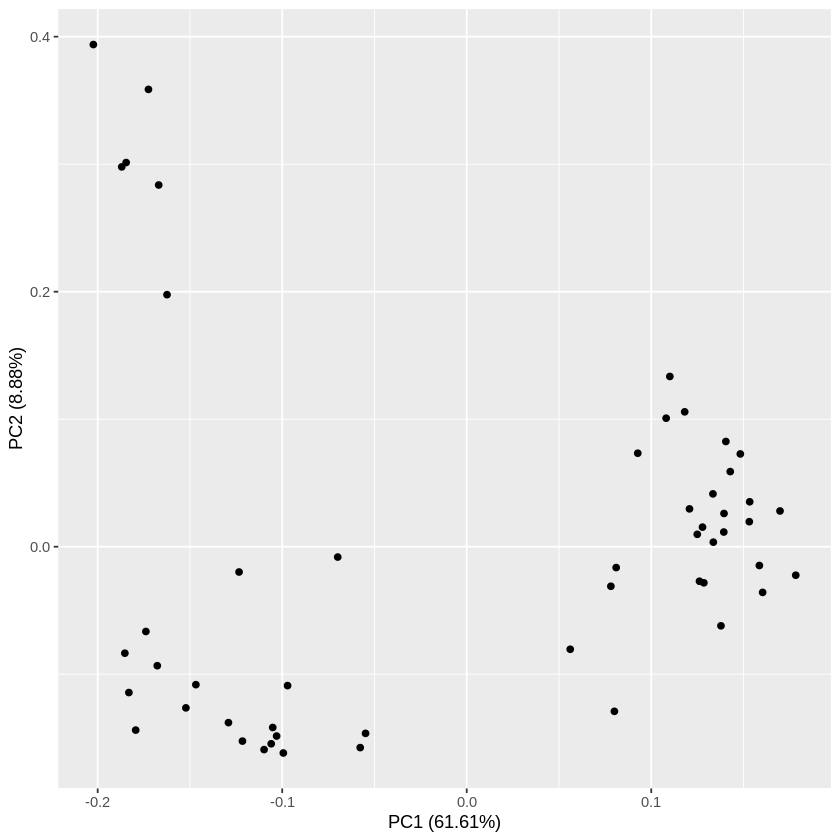

In [ ]:
install.packages("ggfortify")
library(ggfortify)

autoplot(pca_res)

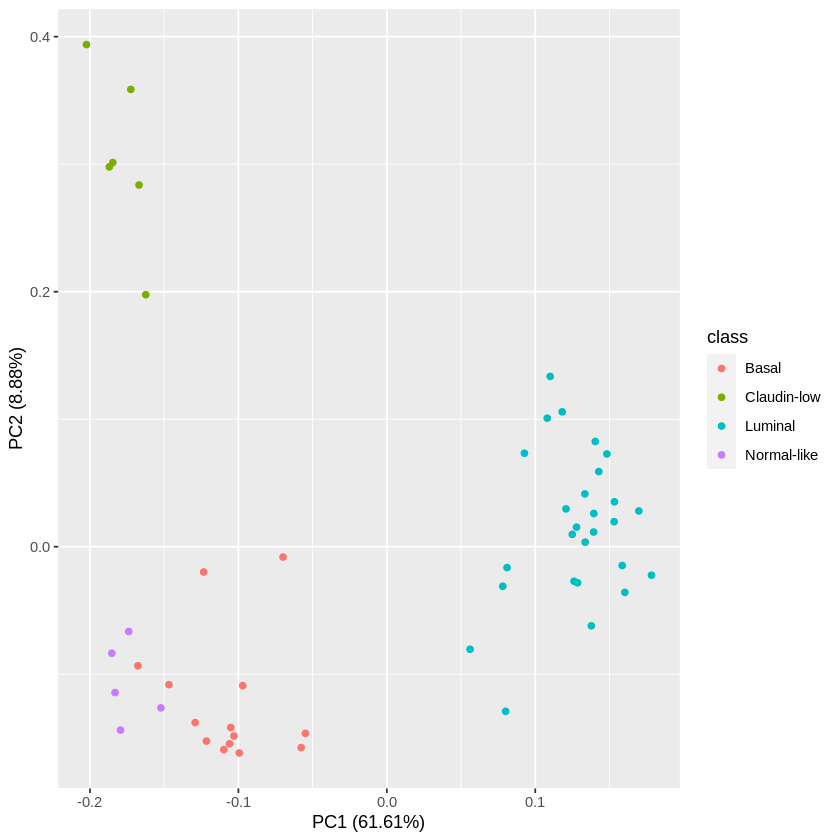

In [ ]:
#color PCA plot based on class of samples

autoplot(pca_res, data=pca_input, colour="class")
